#### 目录
* 原题描述 1217.玩筹码
* 第一遍解法 12/10
* 网上解法
* 优化自己的代码
* 第二遍解法 

#### 1. 问题描述
有一堆石头，每块石头的重量都是正整数。

每一回合，从中选出两块最重的石头，然后将它们一起粉碎。假设石头的重量分别为 x 和 y，且 x <= y。那么粉碎的可能结果如下：

>如果 x == y，那么两块石头都会被完全粉碎；  
如果 x != y，那么重量为 x 的石头将会完全粉碎，而重量为 y 的石头新重量为 y-x。   
最后，最多只会剩下一块石头。返回此石头的重量。如果没有石头剩下，就返回 0。


#### 2、我的第一次解法 12.10

**2.1 思路**

* 没有思路，用最大数减掉剩下的所有数取绝对值 返回
**2.2 代码尝试**

In [ ]:
class Solution:
    def lastStoneWeight(self, stones: List[int]) -> int:
        stones= sorted(stones,reverse=True)
        tmp = stones[0]   
        for i in range(len(stones)-1):
            tmp =abs(tmp-stones[i+1])
            print(tmp)
        return(tmp)
                
                
## 运行结果错误，思路应该也是错的

**2.3 正确代码解析**


#### 解法1

其实大家也是暴力解法，先取出最重的两个石头，相减取绝对值，放到数组后面，循环判断

```python



```

#### 解法2
使用堆 结构实现优先队列
不断找top2 用堆来解决

``` python
class Solution:
    def lastStoneWeight(self, stones: List[int]) -> int:
        import heapq  ## heapq库是专门处理最小堆的库
        stones_heap = [-i for i in stones]  ## 我们要取最大值 就把数据转换为负值
        heapq.heapify(stones_heap)  ## 把list最小推结构化；时间复杂度是O(n)
        while len(stones_heap) > 1:  ## 当至少还有2块石头的时候
            a = heapq.heappop(stones_heap)  ## 取出质量最大的石头（因为是负数，所以值是最小）；时间复杂度是O(logn)，因为取出后还要用logn的时间保持堆结构
            b = heapq.heappop(stones_heap)  ## 在剩下的石头里取出质量最大的石头；时间复杂度是O(logn)
            if a < b:  ## 如果第一块石头比第二块重，那么把摩擦剩下的小石头放进堆里
                heapq.heappush(stones_heap, a - b)  ## 如果两块石头一样重，就都没有了
                
        if stones_heap:
            res = -stones_heap[0]  ## 如果剩下石头，那么返回值是其质量
        else:
            res =  0  ## 如果不剩下石头，那么返回值是0
        return res
```

**2.4 我的代码改进**



In [ ]:
class Solution(object):
    def lastStoneWeight(self, stones):
        import heapq
        stones=map(lambda x:-x,stones)
        heapq.heapify(stones) 
        while(len(stones)>1):
            max1=heapq.heappop(stones)
            if stones:
                max2=heapq.heappop(stones)
                if(max1<max2):
                    heapq.heappush(stones,max1-max2)
        return 0 if not stones else -stones[0]   


#### 3、什么是堆

**堆结构是一种完全二叉树**， 

堆可以分为最大堆和最小堆
最大堆： 最大堆的父节点大于它的子节点
最小堆： 子节点大于父节点

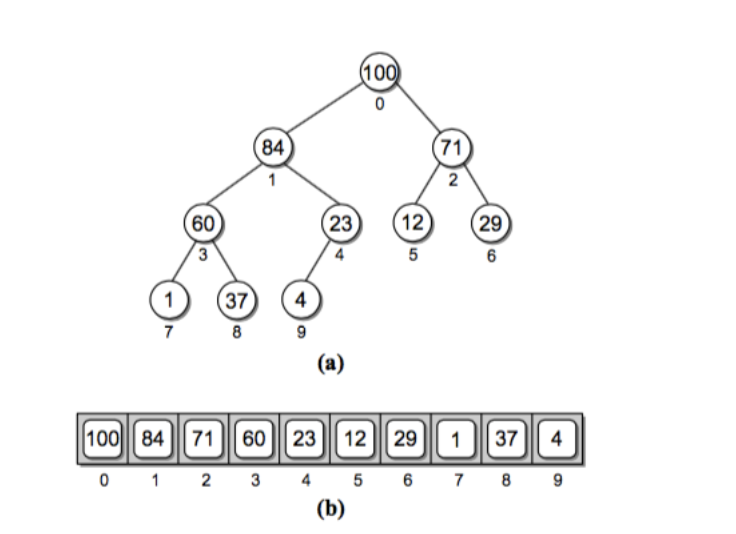

**堆可以使用list实现**

i表示数组中的索引，如果left、right的值超出了数组的索引，则表示这个节点是不存在的。

``` python
parent = int((i-1) / 2)    # 取整
left = 2 * i + 1
right = 2 * i + 2

```

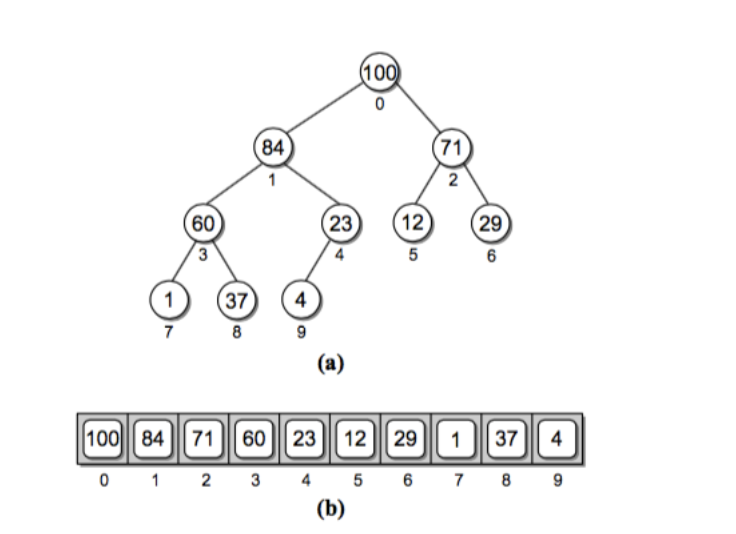

**python中的heapd模块**

Python中创建一个堆可以直接使用list的创建方式H = [], 或者使用heapify()函数将一个存在的列表转为堆。

这个模块提供了下面几种堆的操作：
heapq.heappush(heap, item)
往堆中插入一个值，同时要保持为最小堆。

heapq.heappop(heap)
返回堆中的最小值，并把它从堆中删除，同时保持为最小堆；如果堆为空，发生 IndexError。直接通过heap[0]可以获取最小值并不从堆中把它删除。

heapq.heappushpop(heap, item)
向堆中插入值后再弹出堆中的最小值，这个函数的速度比直接使用heappush() 和heappop()的效率更加高。

heapq.heapreplace(heap, item)
弹出和返回堆中的最小值再插入一个新的值。堆的大小没有改变。如果堆为空，产生 IndexError。
这一个操作也比直接使用heappush() 和heappop()的效率更加高，尤其适合使用在固定堆大小不变的情况。
与上一个函数相比，这个函数返回的值可能要比将要插入到堆的值大。

heapq.heapify(x)
将一个list转为最小堆，线性时间复杂度，O(n).
